In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_agent_analysis_grid(agent_log_path, run_label=None, top_n=4):
    """
    Plots a 2x2 grid of agent-level analytics with improved layout and label handling.
    """
    # Load and clean data
    df = pd.read_csv(agent_log_path)
    df.columns = df.columns.str.strip()

    if run_label is None:
        run_label = os.path.basename(os.path.dirname(agent_log_path))

    # Top-N agents
    top_agents = (
        df.sort_values("AvgScore", ascending=False)
          .groupby("Generation", group_keys=False)
          .head(top_n)
          .reset_index(drop=True)
    )

    sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
    fig, axs = plt.subplots(2, 2, figsize=(18, 13), constrained_layout=True)
    fig.suptitle(f"{run_label} — Agent Behavior Analysis (Top {top_n} per Generation)", 
                 fontsize=18, fontweight='bold', y=1.02)

    # Plot 1: Score vs Tetrises
    corr_tetris = top_agents["AvgScore"].corr(top_agents["AvgNumTetris"])
    sns.scatterplot(
        data=top_agents,
        x="AvgNumTetris",
        y="AvgScore",
        hue="Generation",
        palette="mako",
        edgecolor="black",
        linewidth=0.4,
        s=60,
        alpha=0.85,
        ax=axs[0, 0]
    )
    axs[0, 0].set_title(f"Score vs Tetrises (r = {corr_tetris:.2f})", fontweight='bold')
    axs[0, 0].set_xlabel("Average Tetrises")
    axs[0, 0].set_ylabel("Average Score")
    axs[0, 0].legend(loc="best", fontsize=9)

    # Plot 2: Score vs Time
    corr_time = top_agents["AvgScore"].corr(top_agents["AvgTime"])
    sns.scatterplot(
        data=top_agents,
        x="AvgTime",
        y="AvgScore",
        hue="Generation",
        palette="flare",
        edgecolor="black",
        linewidth=0.4,
        s=60,
        alpha=0.85,
        ax=axs[0, 1]
    )
    axs[0, 1].set_title(f"Score vs Survival Time (r = {corr_time:.2f})", fontweight='bold')
    axs[0, 1].set_xlabel("Average Time")
    axs[0, 1].set_ylabel("Average Score")
    axs[0, 1].legend(loc="best", fontsize=9)

    # Plot 3: Line clear breakdown
    line_stats = top_agents.groupby("Generation")[[
        "AvgNum1Line", "AvgNum2Line", "AvgNum3Line", "AvgNumTetris"
    ]].mean()

    line_stats.plot(
        kind="bar",
        stacked=True,
        ax=axs[1, 0],
        edgecolor="black",
        colormap="Set2",
        width=0.75
    )
    axs[1, 0].set_title("Average Line Clears per Generation", fontweight='bold')
    axs[1, 0].set_xlabel("Generation")
    axs[1, 0].set_ylabel("Lines Cleared")
    axs[1, 0].legend(title="Line Type", loc="upper right", fontsize=9)
    axs[1, 0].tick_params(axis='x', labelrotation=65)

    # Plot 4: Weight vs Performance heatmap
    performance_cols = ["AvgScore", "AvgLines", "AvgTime", "AvgNumTetris"]
    weight_cols = [col for col in df.columns if col.startswith("W")]
    corr_matrix = df[performance_cols + weight_cols].corr()

    sns.heatmap(
        corr_matrix.loc[performance_cols, weight_cols],
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        ax=axs[1, 1],
        cbar_kws={"shrink": 0.7}
    )
    axs[1, 1].set_title("Weight vs Performance Correlation", fontweight='bold')

    # Final polish
    for ax in axs.flat:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)
        ax.tick_params(axis='both', labelsize=9)

    plt.show()


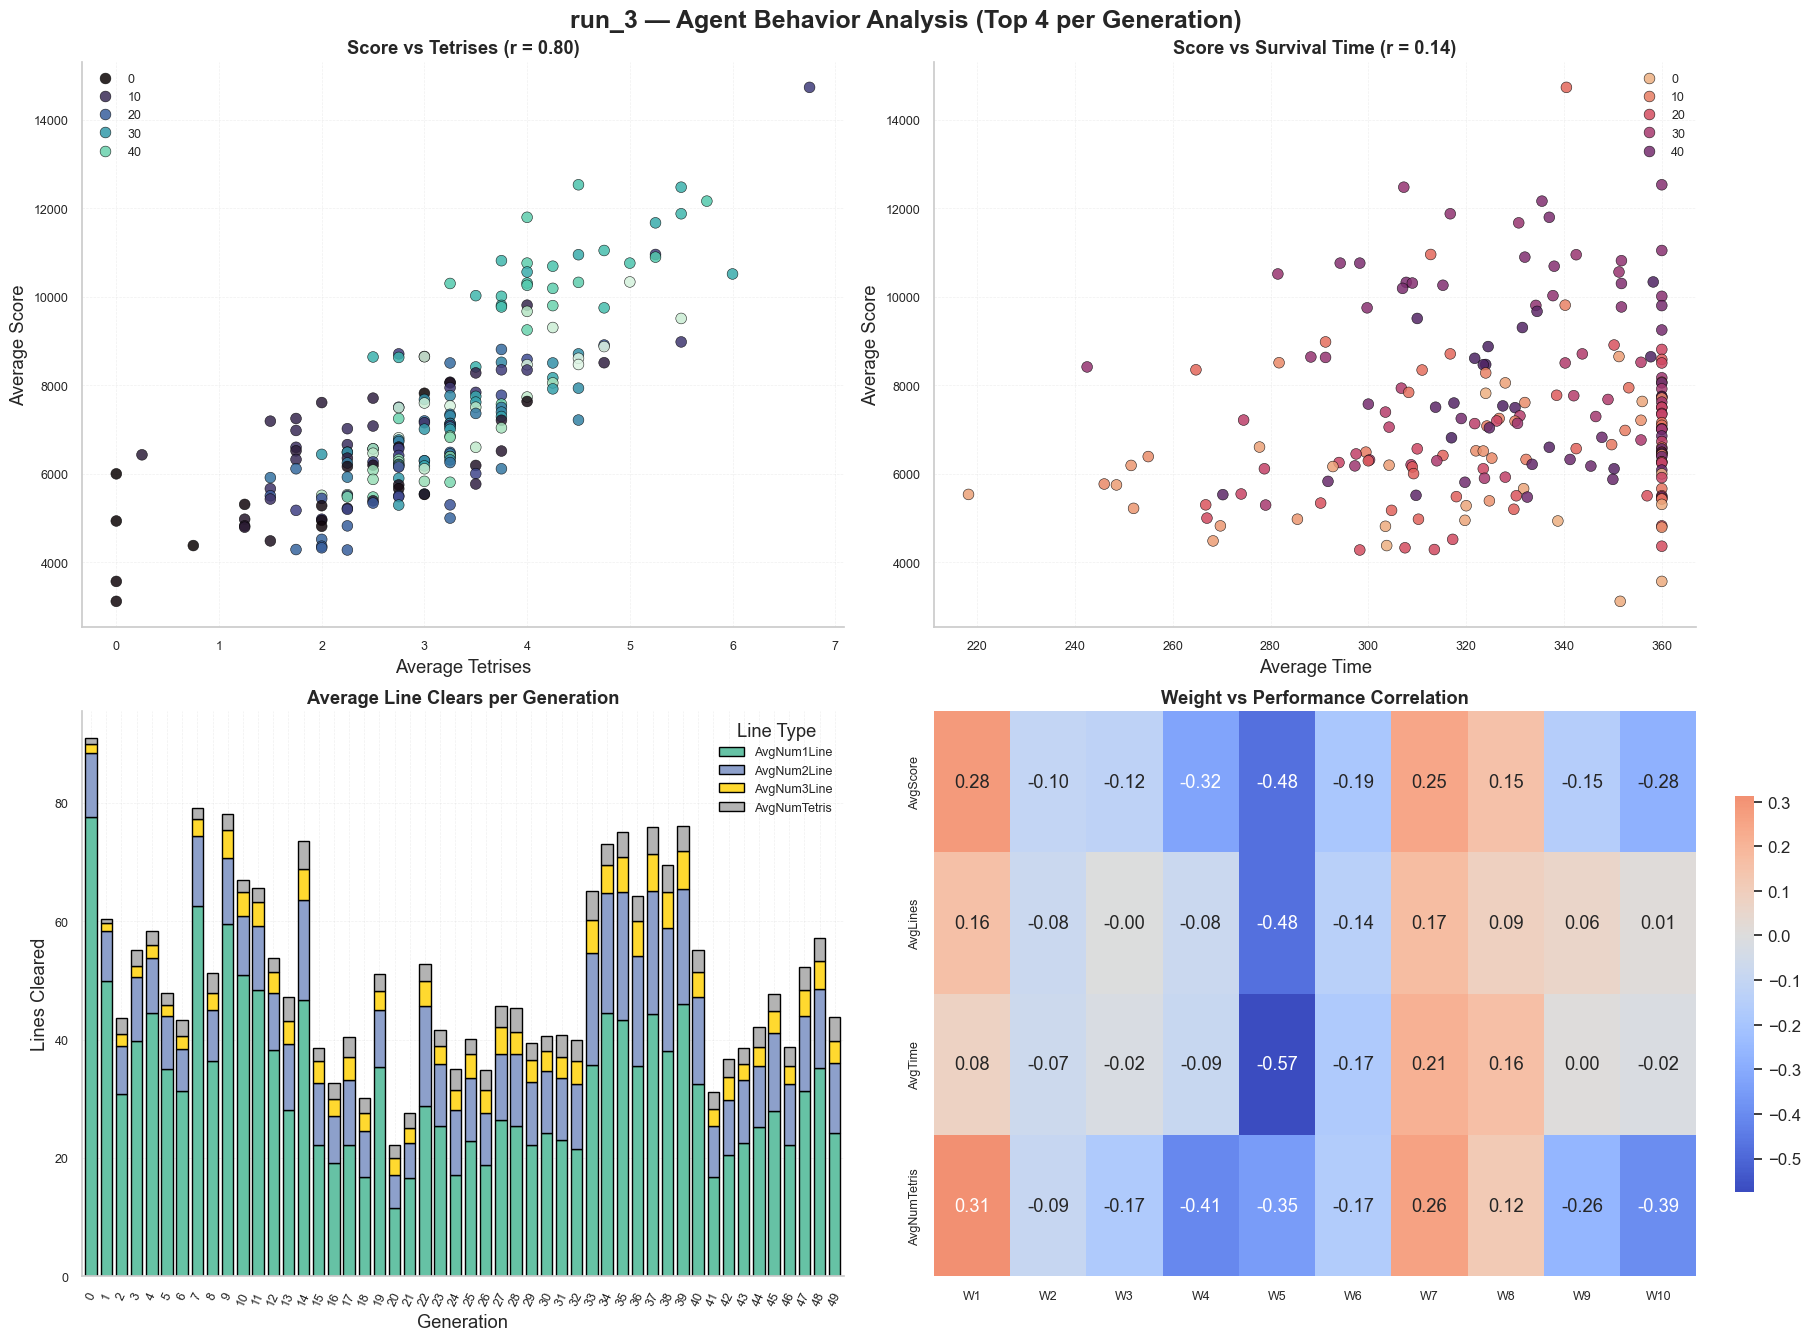

In [40]:
plot_agent_analysis_grid(r"D:\Tetris-Project\results\GA\run_3\agent_log.csv")

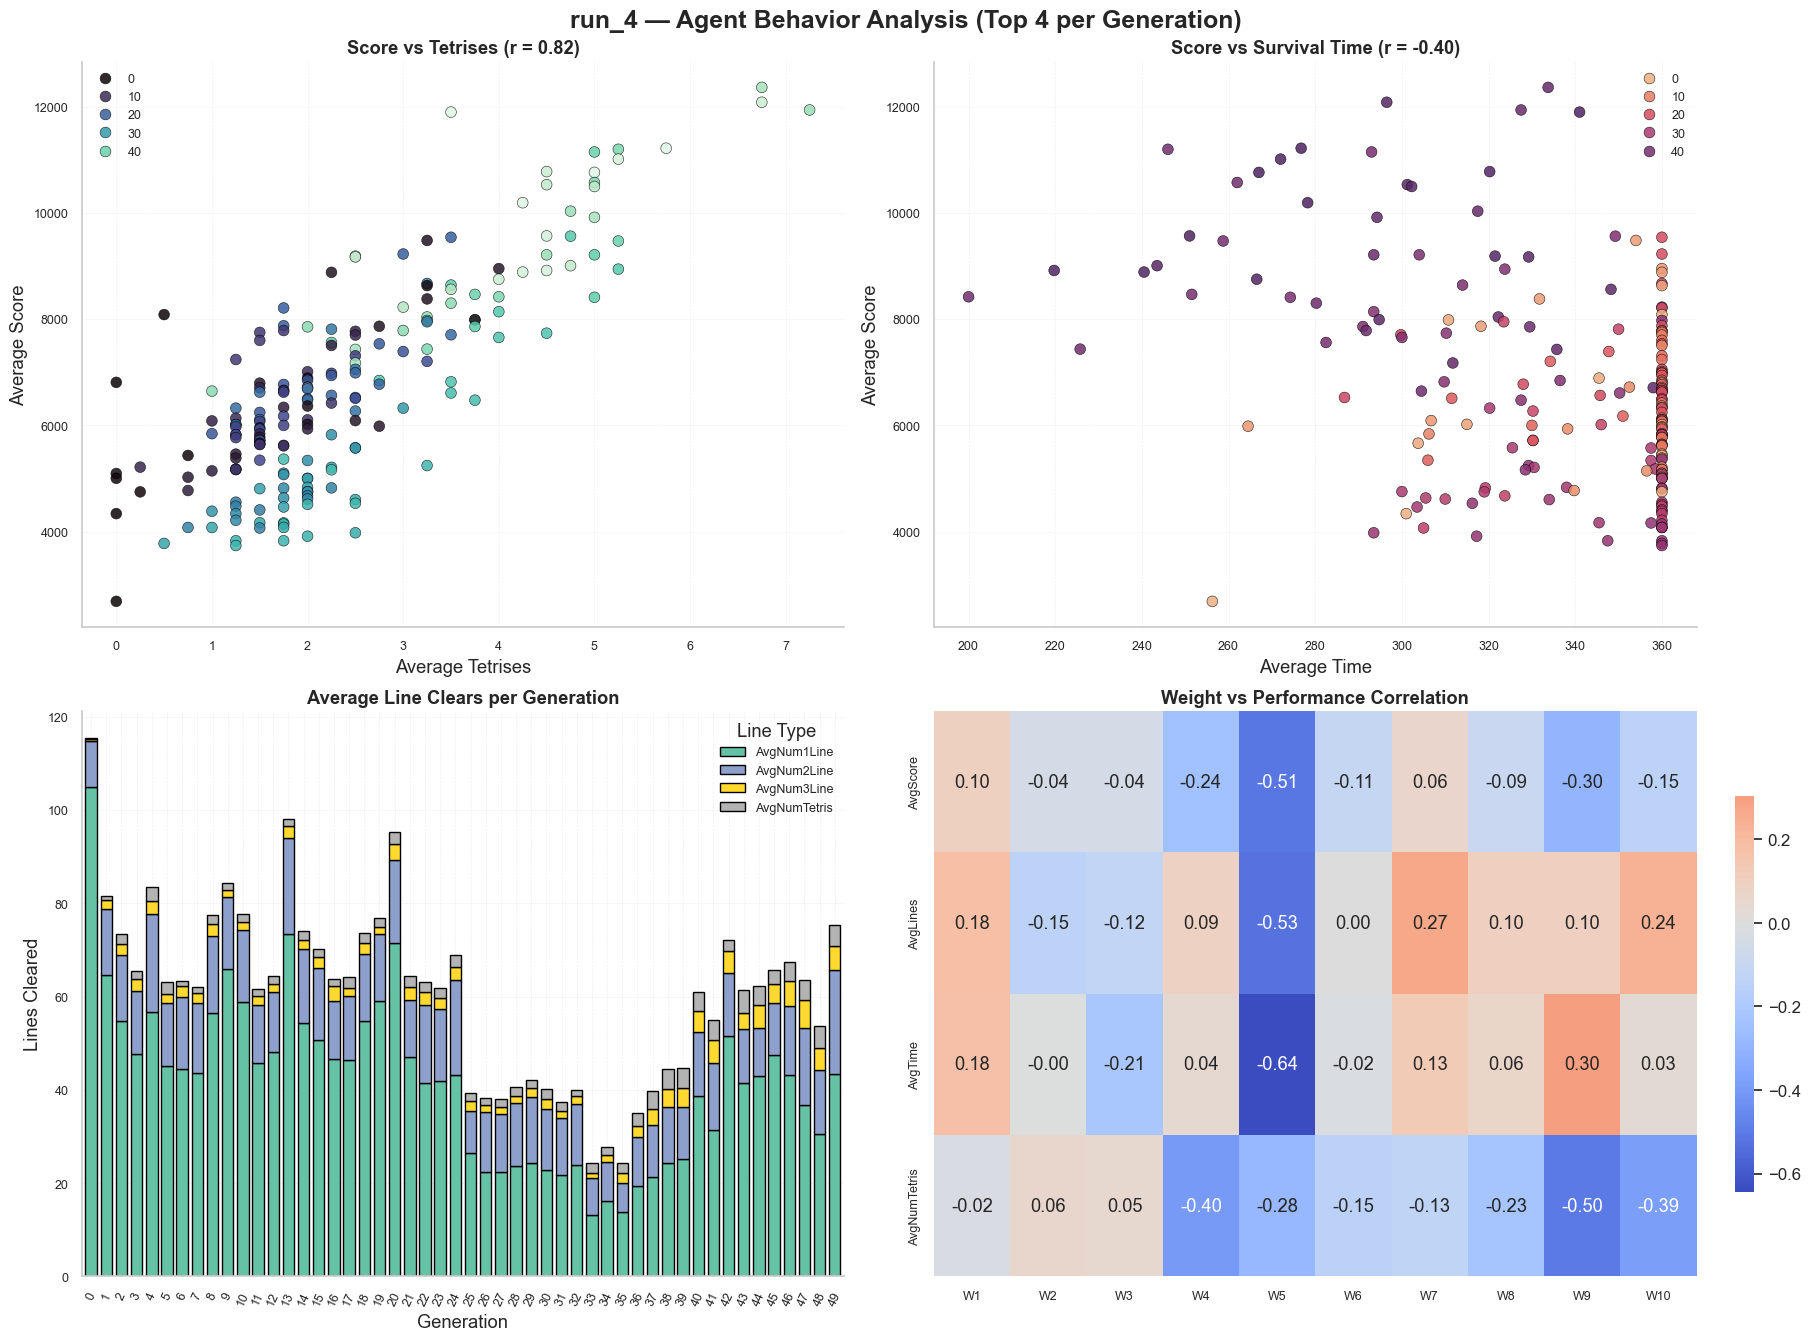

In [41]:
plot_agent_analysis_grid(r"D:\Tetris-Project\results\GA\run_4\agent_log.csv")

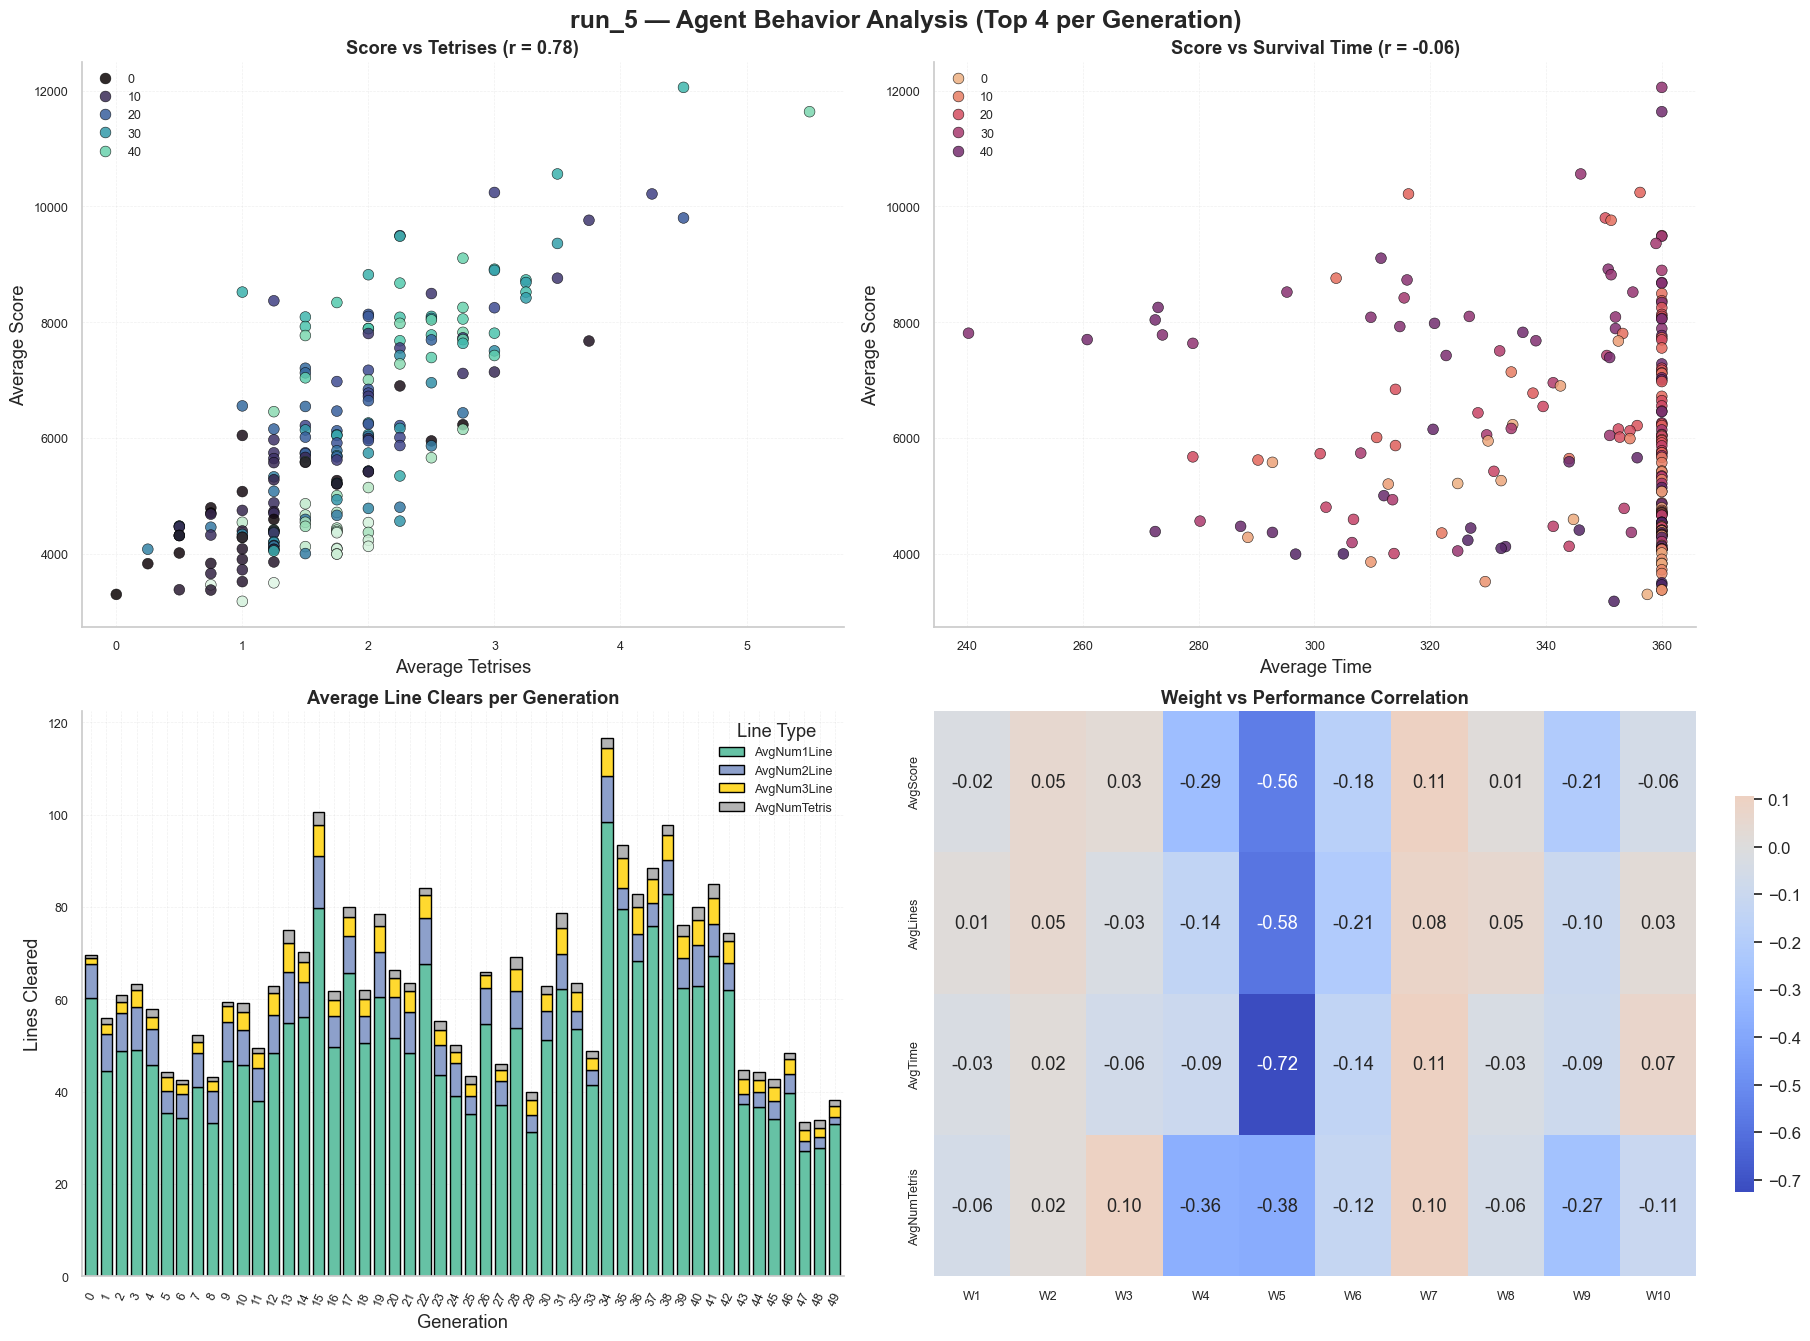

In [42]:
plot_agent_analysis_grid(r"D:\Tetris-Project\results\GA\run_5\agent_log.csv")

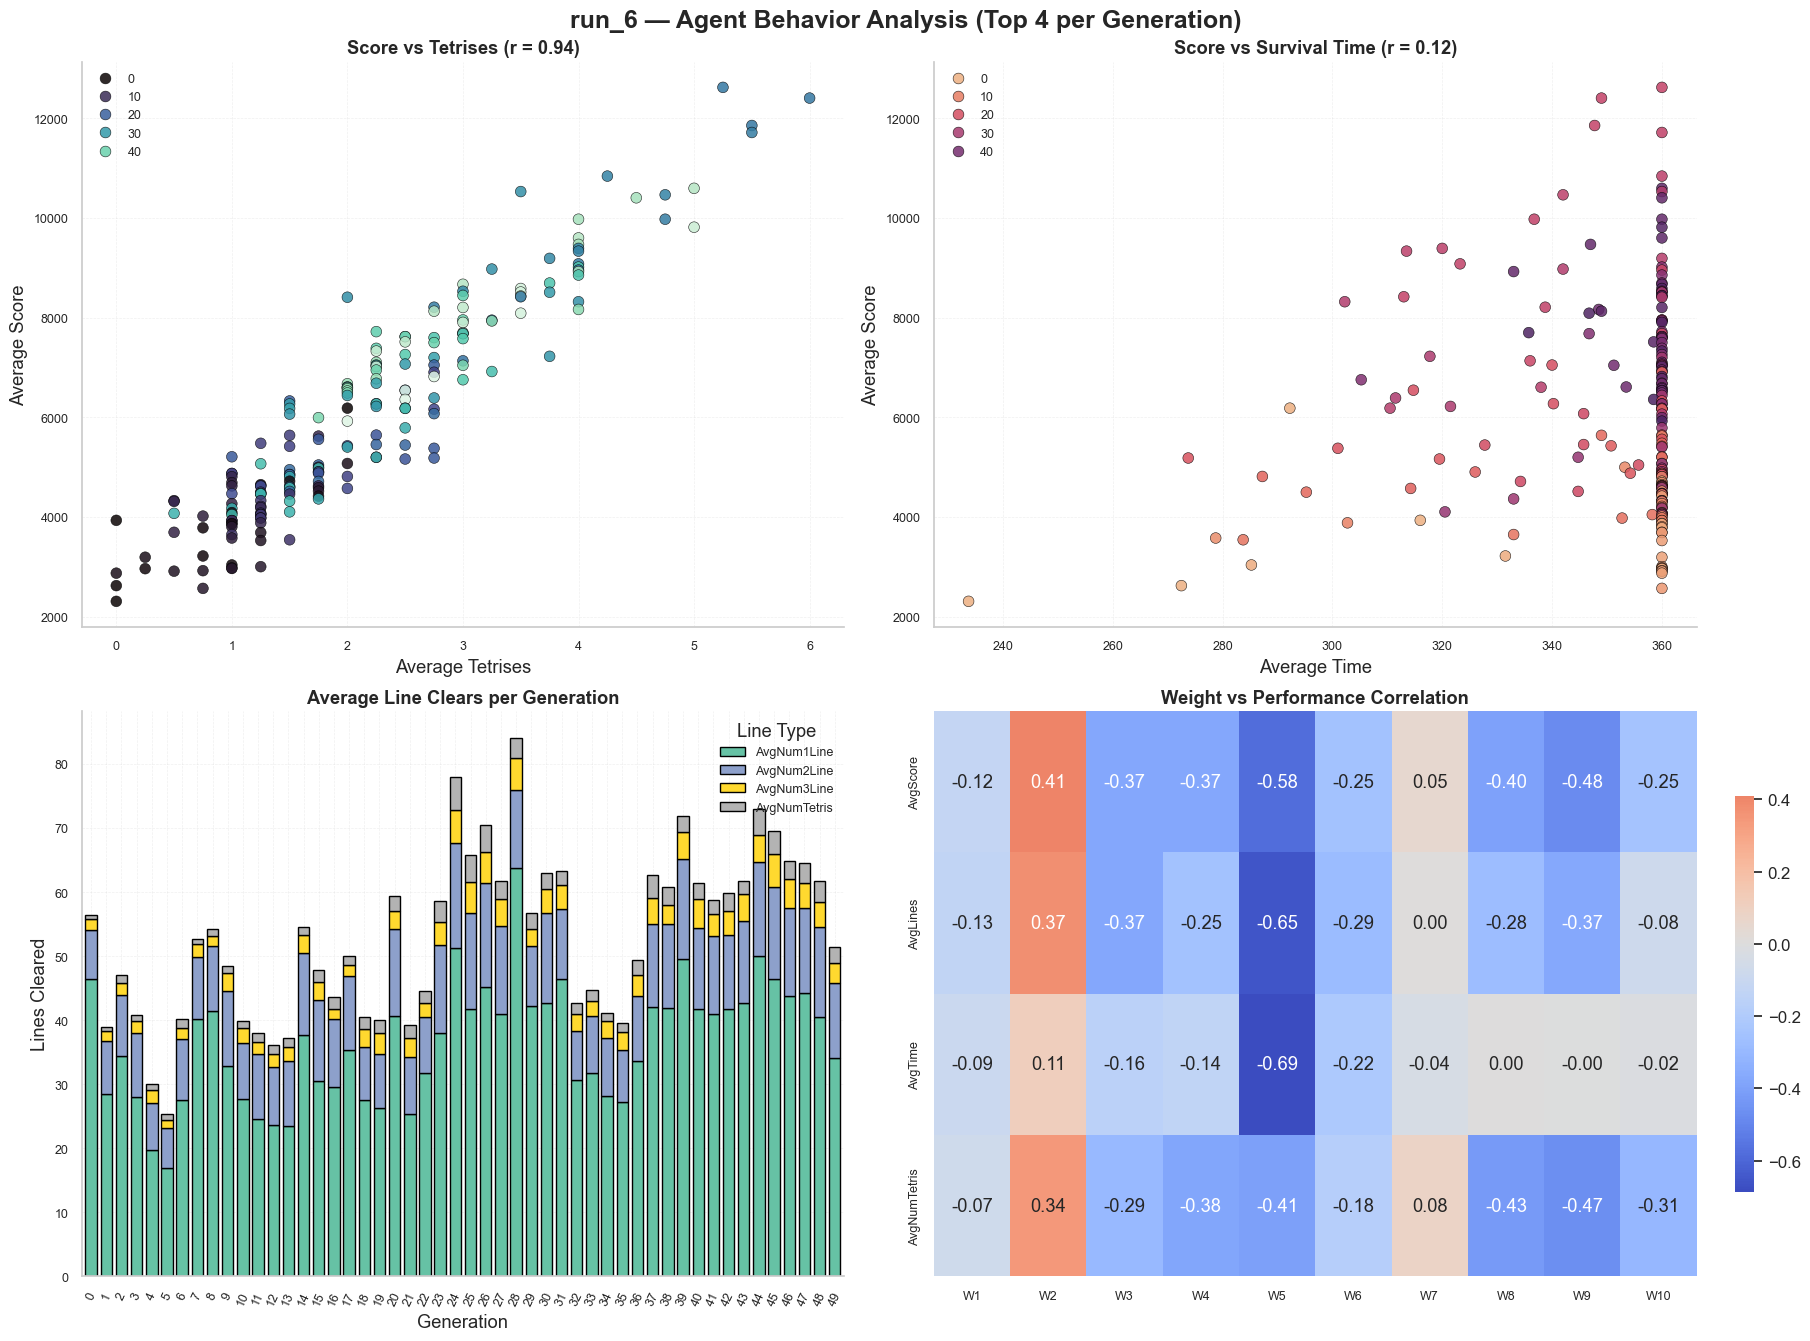

In [43]:
plot_agent_analysis_grid(r"D:\Tetris-Project\results\GA\run_6\agent_log.csv")